In [14]:
%pip install Levenshtein

     |████████████████████████████████| 257 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 16.9 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 16.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
links_to_wavs = "/home/nikola/projects/parlaspeech/wav/"
mappingsfile = "/home/korzinek/kaldi/exp/ali_all/wav.scp"
segmentsfile = "/home/korzinek/kaldi/exp/ali_all/asr.json"

from Levenshtein import distance
import json
contents = []
with open(segmentsfile, "r") as file:
    for line in file.readlines():
        contents.append(json.loads(line))
import pandas as pd
segments = pd.DataFrame(contents)

In [11]:
reconame, longname = [],[]
with open(mappingsfile) as f:
    for line in f.readlines():
        reconame.append(line[0:7])
        longname.append(line[8:-1])

mappings = pd.DataFrame(data={"reconame": reconame, "longname": longname})

In [19]:
import os
lookup_dict = {str(f.split()):f for f in os.listdir(links_to_wavs)}

def get_correct_filename(s):
    return lookup_dict.get(str(s.split()), None)

In [20]:
segments["true_file"] = segments.file.apply(get_correct_filename)

In [21]:
None in segments.true_file

False

In [22]:
segments.head(3)

,file,start,end,words,word_start_times,word_end_times,asr,true_file
0,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",1853.82,1873.66,"[konačni, prijedlog, zakona, o, izmjenama, i, ...","[0, 0.47, 0.8, 1.21, 1.26, 1.79, 1.82, 2.34, 2...","[0.47, 0.8, 1.21, 1.26, 1.79, 1.82, 2.34, 2.78...","[konačni, prijedlog, zakona, o, izmjenama, i, ...","01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP..."
1,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",1874.08,1893.99,"[u, svezi, sa, člankom, sto, devedeset, poslov...","[0, 0.11, 0.48, 0.66, 1.12, 1.36, 1.94, 2.53, ...","[0.11, 0.48, 0.66, 1.12, 1.36, 1.94, 2.53, 3.0...","[u, svezi, sa, člankom, sto, devedeset, poslov...","01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP..."
2,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",1893.99,1909.04,"[za, zakonodavstvo, i, odbor, za, financije, i...","[0, 0.17, 1.12, 1.24, 1.49, 1.65, 2.12, 2.15, ...","[0.17, 1.12, 1.24, 1.49, 1.65, 2.12, 2.15, 2.5...","[za, zakonodavstvo, i, odbor, za, financije, d...","01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP..."


In [31]:
print("segments.shape before:", segments.shape)
segments = segments.merge(mappings, left_on="true_file", right_on="longname", how="left")
print("segments.shape after:", segments.shape)

segments.shape before: (447542, 8)
segments.shape after: (447542, 10)


In [47]:
import parse
p = parse.compile("{start}[{hash}].wav")
def get_hash(s):
    return p.parse(s)["hash"]


In [48]:
segments["yt_hash"] = segments.true_file.apply(get_hash)

In [59]:
segments["hashname"] = segments.apply(lambda row: f"_{row.yt_hash}_{row.start}-{row.end}.wav", axis=1)


In [60]:
segments.head(1)

,file,start,end,words,word_start_times,word_end_times,asr,true_file,reconame,longname,yt_hash,hashname
0,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",1853.82,1873.66,"[konačni, prijedlog, zakona, o, izmjenama, i, ...","[0, 0.47, 0.8, 1.21, 1.26, 1.79, 1.82, 2.34, 2...","[0.47, 0.8, 1.21, 1.26, 1.79, 1.82, 2.34, 2.78...","[konačni, prijedlog, zakona, o, izmjenama, i, ...","01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",reco723,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",sPNuDebATRM,sPNuDebATRM_1853.82-1873.66.wav


In [69]:
sample = pd.read_csv("transcripts.csv").iloc[0:, 1:]
sample["key"] = sample.apply(lambda row: row.file+str(row.start)+str(row.end), axis = 1)
segments["key"] = segments.apply(lambda row: row.file+str(row.start)+str(row.end), axis = 1)
segments["was_in_samples"] = segments.key.isin(sample.key)


In [70]:
segments.head(2)

,file,start,end,words,word_start_times,word_end_times,asr,true_file,reconame,longname,yt_hash,hashname,key,was_in_samples
0,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",1853.82,1873.66,"[konačni, prijedlog, zakona, o, izmjenama, i, ...","[0, 0.47, 0.8, 1.21, 1.26, 1.79, 1.82, 2.34, 2...","[0.47, 0.8, 1.21, 1.26, 1.79, 1.82, 2.34, 2.78...","[konačni, prijedlog, zakona, o, izmjenama, i, ...","01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",reco723,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",sPNuDebATRM,sPNuDebATRM_1853.82-1873.66.wav,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",False
1,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",1874.08,1893.99,"[u, svezi, sa, člankom, sto, devedeset, poslov...","[0, 0.11, 0.48, 0.66, 1.12, 1.36, 1.94, 2.53, ...","[0.11, 0.48, 0.66, 1.12, 1.36, 1.94, 2.53, 3.0...","[u, svezi, sa, člankom, sto, devedeset, poslov...","01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",reco723,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",sPNuDebATRM,sPNuDebATRM_1874.08-1893.99.wav,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",False


In [73]:
segments["human_transcript"] = segments.words.str.join(" ")
segments["asr_transcript"] = segments.asr.str.join(" ")

In [74]:
from Levenshtein import distance
def sim(a, b):
    return 1-(distance(a,b)*2/(len(a)+len(b)))

segments["sim"] = segments.apply(lambda row: sim(row.human_transcript, row.asr_transcript), axis=1)

In [75]:
segments.head(2)

,file,start,end,words,word_start_times,word_end_times,asr,true_file,reconame,longname,yt_hash,hashname,key,was_in_samples,human_transcript,asr_transcript,sim
0,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",1853.82,1873.66,"[konačni, prijedlog, zakona, o, izmjenama, i, ...","[0, 0.47, 0.8, 1.21, 1.26, 1.79, 1.82, 2.34, 2...","[0.47, 0.8, 1.21, 1.26, 1.79, 1.82, 2.34, 2.78...","[konačni, prijedlog, zakona, o, izmjenama, i, ...","01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",reco723,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",sPNuDebATRM,sPNuDebATRM_1853.82-1873.66.wav,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",False,konačni prijedlog zakona o izmjenama i dopunam...,konačni prijedlog zakona o izmjenama i dopunam...,0.99665
1,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",1874.08,1893.99,"[u, svezi, sa, člankom, sto, devedeset, poslov...","[0, 0.11, 0.48, 0.66, 1.12, 1.36, 1.94, 2.53, ...","[0.11, 0.48, 0.66, 1.12, 1.36, 1.94, 2.53, 3.0...","[u, svezi, sa, člankom, sto, devedeset, poslov...","01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",reco723,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",sPNuDebATRM,sPNuDebATRM_1874.08-1893.99.wav,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",False,u svezi sa člankom sto devedeset poslovnika hr...,u svezi sa člankom sto devedeset poslovnika hr...,1.00000


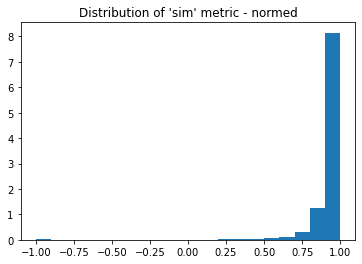

In [97]:
import matplotlib.pyplot as plt
try:
    plt.style.use(["science", "no-latex"])
except OSError:
    pass
plt.title("Distribution of 'sim' metric - normed")
plt.hist(segments.sim, bins=20, density=True)
plt.savefig("images/3_sim_metric_distribution.png")
plt.show()

In [98]:
sum(segments.sim>0.8)/segments.shape[0]

0.9385107989864638

In [99]:
segments.head(2)

,file,start,end,words,word_start_times,word_end_times,asr,true_file,reconame,longname,yt_hash,hashname,key,was_in_samples,human_transcript,asr_transcript,sim
0,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",1853.82,1873.66,"[konačni, prijedlog, zakona, o, izmjenama, i, ...","[0, 0.47, 0.8, 1.21, 1.26, 1.79, 1.82, 2.34, 2...","[0.47, 0.8, 1.21, 1.26, 1.79, 1.82, 2.34, 2.78...","[konačni, prijedlog, zakona, o, izmjenama, i, ...","01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",reco723,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",sPNuDebATRM,sPNuDebATRM_1853.82-1873.66.wav,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",False,konačni prijedlog zakona o izmjenama i dopunam...,konačni prijedlog zakona o izmjenama i dopunam...,0.99665
1,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",1874.08,1893.99,"[u, svezi, sa, člankom, sto, devedeset, poslov...","[0, 0.11, 0.48, 0.66, 1.12, 1.36, 1.94, 2.53, ...","[0.11, 0.48, 0.66, 1.12, 1.36, 1.94, 2.53, 3.0...","[u, svezi, sa, člankom, sto, devedeset, poslov...","01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",reco723,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",sPNuDebATRM,sPNuDebATRM_1874.08-1893.99.wav,"01 12 2016 - 1. dio, 2. sjednica, 9. saziv [sP...",False,u svezi sa člankom sto devedeset poslovnika hr...,u svezi sa člankom sto devedeset poslovnika hr...,1.00000


In [100]:
segments.shape


(447542, 17)

In [101]:
segments.columns

Index(['file', 'start', 'end', 'words', 'word_start_times', 'word_end_times',
       'asr', 'true_file', 'reconame', 'longname', 'yt_hash', 'hashname',
       'key', 'was_in_samples', 'human_transcript', 'asr_transcript', 'sim'],
      dtype='object')

In [113]:
segments["split"] = ""
c = segments.sim < 0.8
segments.loc[c, "split"] = "test"
segments.loc[segments.loc[~c, :].sample(2000, random_state=42).index, "split"] = "dev"
segments.loc[segments.split == "", "split"] = "train"
segments.split.value_counts()


train    418241
test      27301
dev        2000
Name: split, dtype: int64

In [114]:
segments.columns

Index(['file', 'start', 'end', 'words', 'word_start_times', 'word_end_times',
       'asr', 'true_file', 'reconame', 'longname', 'yt_hash', 'hashname',
       'key', 'was_in_samples', 'human_transcript', 'asr_transcript', 'sim',
       'split'],
      dtype='object')

In [116]:
segments.to_csv("parlaspeech.csv", index=False)
segments.to_json("parlaspeech.json", orient="records", lines=True)

In [117]:
segments.columns

Index(['file', 'start', 'end', 'words', 'word_start_times', 'word_end_times',
       'asr', 'true_file', 'reconame', 'longname', 'yt_hash', 'hashname',
       'key', 'was_in_samples', 'human_transcript', 'asr_transcript', 'sim',
       'split'],
      dtype='object')

In [119]:
from pydub import AudioSegment
output_dir = "/home/rupnik/macocu/task8/data"
global_counter = 0

for input_filename in segments.true_file.unique():
    subset = segments.loc[segments.true_file==input_filename, :]
    audio = AudioSegment.from_wav(
        os.path.join(
            links_to_wavs,
            input_filename
        )
    )

    for i, row in subset.iterrows():
        print(f"{global_counter:09} of {segments.shape[0]:09}", end = "\r")
        startms = int(row["start"]*1e3)
        endms = int(row["end"]*1e3)
        seg = audio[startms:endms]
        out_path = os.path.join(
            output_dir, row["hashname"]
        )
        seg.export(out_path, format="wav")
        global_counter += 1
